In [1]:
import numpy as np 
import pandas as pd

In [2]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
nltk.download("punkt")  # Pre-trained tokenizer file

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reliance\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download("averaged_perceptron_tagger") # Used for pos tagging

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\reliance\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
nltk.download("stopwords")  # TO remove common stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reliance\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Get the dataset
data = pd.read_csv('spam_or_not_spam.csv')

In [7]:
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [8]:
# Text-Preprocessing
# Removing null values
data.isnull().sum()

email    1
label    0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

email    0
label    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


In [12]:
# Removing stopwords
stop_words = set(stopwords.words("english"))
def remove_stopwords(x):
    return " ".join([word for word in str(x).split() if word not in stop_words])

In [13]:
data['email'] = data['email'].apply(lambda x: remove_stopwords(x))

In [14]:
# Removing the special characters
import neattext.functions as nfx

In [15]:
data['email'] = data["email"].apply(nfx.remove_special_characters)

In [16]:
data['email'] = data['email'].apply(lambda x:x.lower())

In [17]:
# Applying stemming and lemmatization

In [18]:
def get_wordnet_tag(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    elif tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [19]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self,doc):
        tokens = word_tokenize(doc)
        words_n_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word=word,pos=get_wordnet_tag(tag)) for word , tag in words_n_tags]

In [20]:
# Using td-idf to convert words into vector(vector - based modelling)
from sklearn.model_selection import train_test_split
tf_idf = TfidfVectorizer(tokenizer=LemmaTokenizer())

In [21]:
X = data.iloc[:,0].values
y = data.iloc[:,-1].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [23]:
X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)

In [24]:
X_test.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
# How many % of data is non-zero
(((X_train != 0).sum()) / (np.prod(X_train.shape)))*100

0.31888019156961095

In [26]:
tf_idf.get_feature_names()

C:\Users\reliance\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['a',
 'aa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacuxrmplfnumberfhxl',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacnumbermmvznumbercjnumberzld',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacunumberwlcunumberwmnumberdlo',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaabcnumberfudnumberhgknumberxt',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacuxrmplfnumberfhxlnumbermh',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaafcvwyfk',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacuxrmplfnumberfhxlnumbermhyv',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacnlzcunnumberljnumberfetbkvts',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaknumberesw',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaknumberrgunumberjkdaljhgyaxwxhxsvbunumber',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaagvs

C:\Users\reliance\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

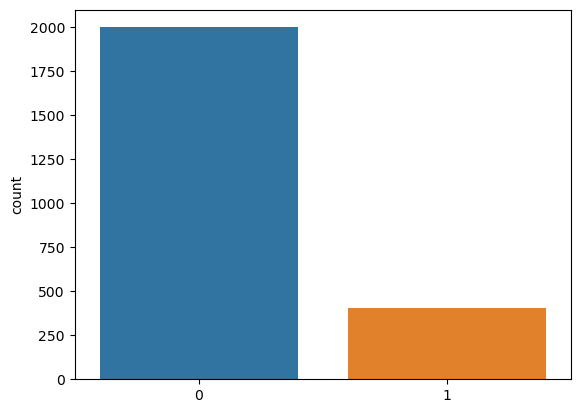

In [27]:
# Checking the labels are properly balanced or not
import seaborn as sns
sns.countplot(y_train)

In [28]:
# So our dataset is not properly balanced
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto',random_state=101)

In [29]:
X_train_sampled , y_train_sampled = smote.fit_resample(X_train,y_train)

<AxesSubplot:ylabel='count'>

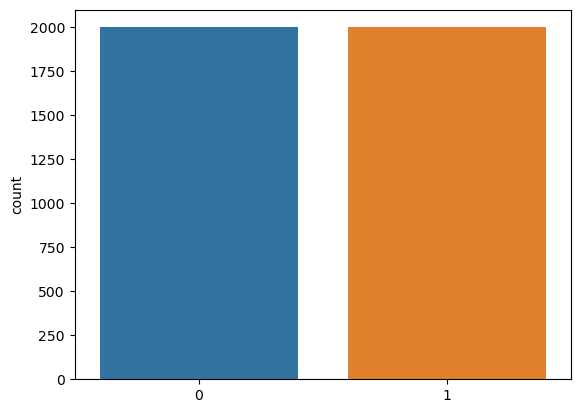

In [30]:
sns.countplot(x=y_train_sampled)

In [31]:
# Now we are set to make a classifier

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
classifier = GaussianNB()

In [49]:
classifier.fit(X_train_sampled.todense(),y_train_sampled)

C:\Users\reliance\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


GaussianNB()

In [51]:
X_train_sampled

<3994x26478 sparse matrix of type '<class 'numpy.float64'>'
	with 456493 stored elements in Compressed Sparse Row format>

In [52]:
y_pred = classifier.predict(X_test.todense())

C:\Users\reliance\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [53]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [54]:
print("Acuuracy Score",accuracy_score(y_test,y_pred))
print()
print("Confusion Metrix: \n",confusion_matrix(y_test,y_pred))
print()
print("Classification report: \n",classification_report(y_test,y_pred))

Acuuracy Score 0.9366666666666666

Confusion Metrix: 
 [[489  14]
 [ 24  73]]

Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       503
           1       0.84      0.75      0.79        97

    accuracy                           0.94       600
   macro avg       0.90      0.86      0.88       600
weighted avg       0.93      0.94      0.94       600



In [55]:
X_test_sampled,y_test_sampled = smote.fit_resample(X_test,y_test)

<AxesSubplot:ylabel='count'>

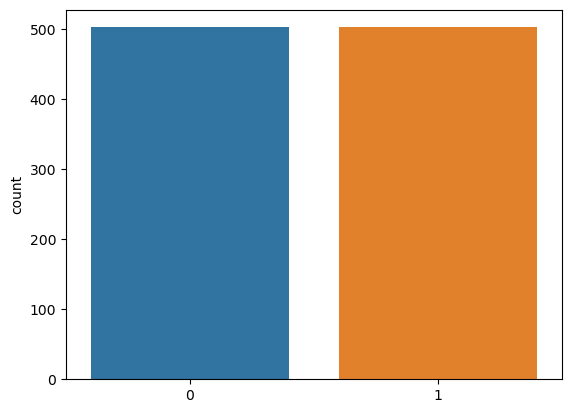

In [56]:
sns.countplot(x=y_test_sampled)